## Devon Ngo
# Chem 30324, Spring 2019, Homework 5
Due Febrary 25, 2020

## Real-world particle-in-a-box.
### A one-dimensional particle-in-a-box is a simple but plausible model for the π electrons of a conjugated alkene, like butadiene ($C_4H_6$, shown here). Suppose all the C–C bonds in a polyene are 1.4 Å long and the polyenes are perfectly linear.

<img src="imgs/HW5-1.png"  width="360">

### 1. Plot out the energies of the $n = 1 – 6$ particle-in-a-box states for ethylene (2 carbon chain), butadiene (4 carbon chain), hexatriene (6 carbon chain), octatetraene (8 carbon chain), and decapentaene (10 carbon chain). What happens to the spacing between energy levels as the molecule gets longer? 

As the spacing between energy levels become larger, the harder it is for an particle to reach that energy level. In other words, it will require more energy/stronger frequency to excite an particle to that state.

In [105]:
import numpy as np
import matplotlib.pyplot as plt 
import math as m

In [2]:
hbar = 1.05457e-34 # J/s
l = .14 # nm
m = np.array([28.05, 54.09, 80.13, 106.16]) # array of masses in g/mol
c = np.array([1, 3 , 5, 7]) # number of carbon chains
n = np.arange(1, 7, 1) # create array of n values
E = np.zeros([4,6])

def energy(n, m, L):
    return ((n**2) * (3.1415**2) * (hbar**2))/(2*m*(L**2))

In [3]:
for i in range(len(m)):
    for j in range(len(n)):
        L = l * c[i]
        E[i][j] = energy(n[j], m[i], L)

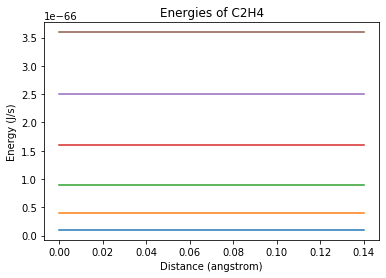

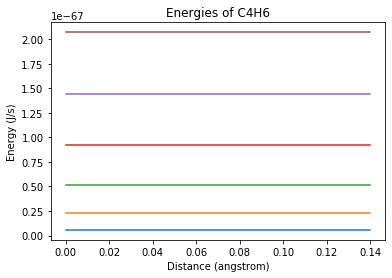

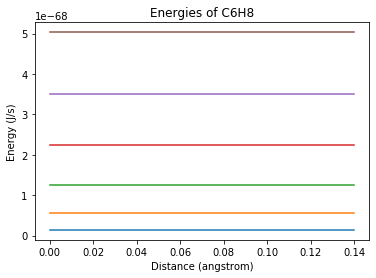

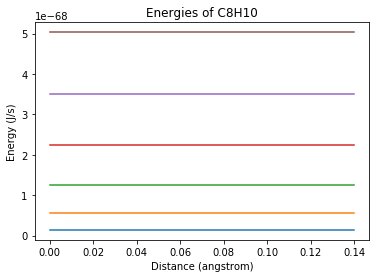

In [4]:
x = np.linspace(0,l,50)
n2 = np.ones([6, 50])
n4 = np.ones([6, 50])
n6 = np.ones([6, 50])
n8 = np.ones([6, 50])

for i in range(6):
    n2[i] = E[0][i] * n2[i]
    plt.plot(x, n2[i])
plt.xlabel('Distance (angstrom)')
plt.ylabel('Energy (J/s)')
plt.title('Energies of C2H4')
plt.show()

for i in range(6):
    n4[i] = E[1][i] * n4[i]
    plt.plot(x, n4[i])
plt.xlabel('Distance (angstrom)')
plt.ylabel('Energy (J/s)')
plt.title('Energies of C4H6')
plt.show()

for i in range(6):
    n6[i] = E[2][i] * n6[i]
    plt.plot(x, n6[i])
plt.xlabel('Distance (angstrom)')
plt.ylabel('Energy (J/s)')
plt.title('Energies of C6H8')
plt.show()

for i in range(6):
    n8[i] = E[3][i] * n6[i]
    plt.plot(x, n6[i])
plt.xlabel('Distance (angstrom)')
plt.ylabel('Energy (J/s)')
plt.title('Energies of C8H10')
plt.show()


### 2. Plot out the normalized $n = 2$ particle-in-a-box wavefunction for an electron in butadiene and the normalized $n = 2$ probability distribution. Indicate on the plots the most probable location(s) of the electron, the average location of the electron, and the positions of any nodes.

In [5]:
def wave(x, n, L):
    return np.sqrt(2/L) * np.sin((n*3.14159*x)/L)

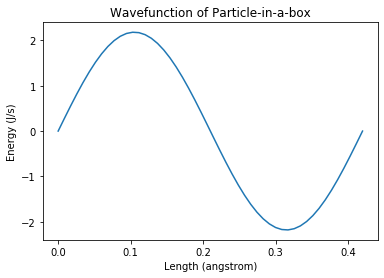

In [6]:
len = l * 3
n = 2
xlen = np.linspace(0,len, 50)
wavefn = np.zeros(50)

for i in range(50):
    wavefn[i] = wave(xlen[i], n, len)

plt.plot(xlen, wavefn)
plt.title('Wavefunction of Particle-in-a-box')
plt.xlabel('Length (angstrom)')
plt.ylabel('Energy (J/s)')
plt.show()

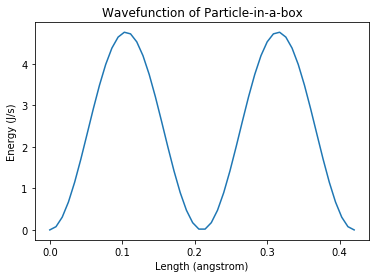

In [88]:
wavefn2 = np.zeros(50)

for i in range(50):
    wavefn2[i] = wave(xlen[i], n, len)**2

plt.plot(xlen, wavefn2)
plt.title('Wavefunction of Particle-in-a-box')
plt.xlabel('Length (angstrom)')
plt.ylabel('Energy (J/s)')
plt.show()

### 3. Butadiene has 4 π electrons, and we will learn later that in its lowest energy state, two of these are in the $n = 1$ and two in the $n = 2$ levels. Compare the wavelength of light (in nm) necessary to promote (“excite”) one electron from either of these levels to the empty $n = 3$ level.

In [18]:
me = 9.10938215E-31 # mass of electron in kg
l = 3 * 1.4E-10
e1 = energy(1, me, l)
e2 = energy(2, me, l)
e3 = energy(3, me, l)


h = 6.62607E-34 # J/s
v1 = (e3-e1)/h
v2 = (e3-e2)/h


c = 2.99792458E8 # m/s
# c = lambda * nu
wl1 = (c/v1)*1E9 # nm
wl2 = (c/v2)*1E9 # nm

print('The wavelength required to promote one electron to n=3 from n=1 is {:.3f} nm.'.format(wl1))
print('The wavelength required to promote one electron to n=3 from n=2 is {:.3f} nm.'.format(wl2))

The wavelength required to promote one electron to n=3 from n=1 is 72.708 nm.
The wavelength required to promote one electron to n=3 from n=2 is 116.332 nm.


### 4. The probability of an electron jumping between two energy states by emitting or absorbing light is proportional to the square of the “transition dipole,” given by the integral $\lvert\langle\psi_{initial}\lvert \hat{x}\rvert\psi_{final}\rangle\rvert^2$. Contrast the relative probabilities of an electron jumping from $n = 1$ to $n = 3$ and from $n = 2$ to $n = 3$ levels. Can you propose any general rules about “allowed” and "forbidden" jumps?

In [25]:
def wavemod(nl, nh, x, l):
    return (np.sqrt(2/l) * np.sin((nl*3.14159*x)/l)) * x * (np.sqrt(2/l) * np.sin((nh*3.14159*x)/l))

In [32]:
# energy eqn is = ((n**2) * (3.1415**2) * (hbar**2))/(2*m*(L**2))
from scipy.integrate import quad

n1 = 1
n2 = 2
n3 = 3

winit1 = quad(lambda x: wavemod(n1, n3, x, l), 0, l)[0]
winit2 = quad(lambda x: wavemod(n2, n3, x, l), 0, l)[0]

wint12 = winit1**2
wint22 = winit2**2

print('The relative probability from n=1 to n=3 is {:.5g}.'.format(wint12))
print('The relative probability from n=2 to n=3 is {:.5g}.'.format(wint22))


-6.848688283156434e-26 -8.170554051655806e-11
The relative probability from n=1 to n=3 is 4.6905e-51
The relative probability from n=2 to n=3 is 6.6758e-21


The relative difference from the jump between n=1 to n=3 and n=2 to n=3 has over 30 magnitudes of difference, meaning that n=1 to n=3 is essentially forbidden.

### 5. Consider the reaction of two ethylene molecules to form butadiene:
<img src="imgs/HW5-2.png"  width="360">

### As a very simple estimate, you could take the energy of each molecule as the sum of the energies of its π electrons, allowing only two electrons per energy level. Again taking each C—C bond as 1.4 Å long and treating the π electrons as particles in a box, calculate the total energy of an ethylene and a butadiene molecule within this model (in kJ/mol), and from these calculate the net reaction energy. Compare your results to the experimental reaction enthalpy. How well did the model do?

In [86]:
Na = 6.022E23
eth1 = energy(1, 2*me, l/3)
eth_dub = (2 * eth1 / 1000)*Na # kJ/mol
but = (energy(1, 2*me, l)/1000)*Na # kJ/mol

print('For 2 electrons, the combination resulted in {:2g} kJ/mol.'.format(eth_dub))
print('For 2 electrons, the formula resulted in {:2g} kJ/mol.'.format(but))

For 2 electrons, the combination resulted in 2.46554e-16 kJ/mol.
For 2 electrons, the formula resulted in 1.36975e-17 kJ/mol.


The difference in the two models is significant. The difference was roughly one order of magnitude, showing that it isn't too reliable.

### 6. This particle-in-a-box model has many flaws, not the least of which is that the ends of the polyene “box” are not infinitely high potential walls. In a somewhat better model the π electrons would travel in a finite-depth potential well. State two things that would change from the infinite depth to the finite depth model.

Two things that would change from when switching to the infinite depth model is that:

1. There is now an infinite number of bound solutions.
2. The probability of a particle tunneling is now zero.

## Quantum mechanics of vibrating NO.
### The diatomic nitric oxide (NO) is an unusual and important molecule. It has an odd number of electrons, which is a rarity for stable molecule. It acts as a signaling molecule in the body, helping to regulate blood pressure, is a primary pollutant from combustion, and is a key constituent of smog. It exists in several isotopic forms, but the most common, ${}^{14}$N= ${}^{16}$O, has a bond length of 1.15077 Å and vibrational force constant of 1594.8 N/m.

### 7. Compute the **reduced mass** $\mu$ (amu), **harmonic vibrational frequency** (cm$^{-1}$), and **zero point vibrational energy** (kJ/mol) of  ${}^{14}$N= ${}^{16}$O.  Recall $1/\mu=1/M_\text{N} + 1/M_\text{O}$.

In [106]:
Mn = 14 # amu = g/mol
Mo = 16 # amu = g/mol
k = 1594.8 # N/m


u = ((1/Mn)+(1/Mo))**-1 # amu = g/mol
mu = (u / 1000) / Na # kg

# harmonic vibrational frequency
nu = (1/(2*3.14159))* np.sqrt(k/mu) # 1/s
nu1 = nu / c / 100 # 1/cm

# zero-pt vibrational energy E = (v + 1/2)hv
e0 = .5*h*nu 
efin = e0 / 1000 * Na

print('The reduced mass is {0:.3f} amu, harmonic vibrational frequency is {1:.4g} cm^-1, and zero point vibrational energy is {2:.3g} kJ/mol.'.format(u, nu1, efin))

57079510350623.86
The reduced mass is 7.467 amu, harmonic vibrational frequency is 1.904e+07 cm^-1, and zero point vibrational energy is 11.4 kJ/mol.


### 8. Calculate the classical minimum and maximum values of the $^{14}$N=$^{16}$O bond length for a molecule in the ground vibrational state. Hint: Calculate the classical limits on $x$, the value of $x$ at which the kinetic energy is 0 and thus the total energy equals the potential energy.

In [66]:
l = 1.15077 # angstrom
# calculate change from vibration
x = np.sqrt(2*e0 / k) # m
xA = x* 1E10 # angstrom

print('The change due to vibrations is {0:.3f} A.\nThe minimum bond length is {1:.3f} A. \nThe max bond length is {2:.3f} A.'.format(xA, l-xA, l+xA))

The change due to vibrations is 0.049 A.
The minimum bond length is 1.102 A. 
The max bond length is 1.199 A.


### 9. The normalized ground vibrational wavefunction of N=O can be written 

$$\Psi_{\upsilon=0}(x) = \left ({\frac{1}{\alpha\sqrt{\pi}}}\right )^{1/2}e^{-x^2/2\alpha^2}, \quad x = R-R_{eq}, \quad \alpha = \left ({\frac{\hbar^2}{\mu k}}\right )^{1/4}$$

### where $x = R-R_{eq}$.  Calculate the probability for an ${}^{14}N={}^{16}O$ molecule to have a bond length outside the classical limits. This is an example of quantum mechanical tunneling. 

Integrating using Wolfram Alpha results in a probability outside of classical limits is 0.157. This is found using 1 - the integral of the wavefunction from $-\alpha$ to $\alpha$.

### 10. The *general selection rule* for whether light can excite a vibration of a molecule is that the dipole moment of the molecule must change as it vibrates.  Based on this criterion, do you expect NO to exhibit an absorption vibrational spectrum? 

Yes, because the 3N - 5 rule results in 1, which means that there is one vibrational mode. Since there is a dipole between N and O, this means that NO can exhibit an absorption vibrational moment.

### 11. The *specific selection rule* for whether light can excite a vibration of a molecule is that $\Delta v = \pm 1$.  At ambient temperature, what initial and final vibrational states would contribute most significantly to an NO vibrational spectrum? Justify your answer. (*Hint:* What does the Boltzmann distribution say about the probability to be in each $\nu$ state?)

In [134]:
kb = 1.3806E-23
T = 298 # K
p1 = []
p2 = []

for i in range(6):
    y1 = np.exp(-(i+1.5)*h*nu/(kb*T))
    y2 = np.exp(-.5*h*nu/(kb*T))
    p1.append(y1/y2)
    y3 = np.exp(-(i+2.5)*h*nu/(kb*T))
    p2.append(y3/y1)

for j in range(6):
    print('The probability of excitation from n = 0 to n = {0:.1g} is {1:.5g}.'.format(j+1, p1[j]))

print('\n')
for k in range(6):
    print('The probability of excitation from n = {0:.1g} to n = {1:.1g} is {2:.5g}.'.format(k+1, k+2, p2[k]))

The probability of excitation from n = 0 to n = 1 is 0.00010176.
The probability of excitation from n = 0 to n = 2 is 1.0355e-08.
The probability of excitation from n = 0 to n = 3 is 1.0537e-12.
The probability of excitation from n = 0 to n = 4 is 1.0723e-16.
The probability of excitation from n = 0 to n = 5 is 1.0912e-20.
The probability of excitation from n = 0 to n = 6 is 1.1104e-24.


The probability of excitation from n = 1 to n = 2 is 0.00010176.
The probability of excitation from n = 2 to n = 3 is 0.00010176.
The probability of excitation from n = 3 to n = 4 is 0.00010176.
The probability of excitation from n = 4 to n = 5 is 0.00010176.
The probability of excitation from n = 5 to n = 6 is 0.00010176.
The probability of excitation from n = 6 to n = 7 is 0.00010176.


### 12. Based on your answers to questions 10 and 11, what do you expect the vibrational spectrum of an ${}^{14}N={}^{16}O$ molecule to look like? If it has a spectrum, in what region of the spectrum does it absorb (e.g., ultraviolet, x-ray, ...)?

The vibrational spectrum is expected to look like the region with wavenumbers less than 2000, on the lower end of infrared light. 

## Two-dimensional harmonic oscillator
### Imagine an H atom embedded in a two-dimensional sheet of MoS$_2$.  The H atom vibrates like a two-dimensional harmonic oscillator with mass 1 amu and force constants $k_x$ and $k_y$ in the two directions.

### 13. Write down the Schr&ouml;dinger equation for the vibrating H atom. Remember to include any boundary conditions on the solutions.

$$
(\frac{-\hbar^2}{2m}\left(\frac{d^2}{dx^2} + \frac{d^2}{dy^2} \right) + V(x,y))\psi(x)*\psi(y) = E\psi(x)*\psi(y)
$$
$$
(\frac{-\hbar^2}{2m}\left(\frac{d^2}{dx^2} + \frac{d^2}{dy^2} \right) + (\frac{1}{2}k_xx^2+\frac{1}{2}k_yy^2))\psi(x)*\psi(y) = E\psi(x)*\psi(y)
$$

#### Boundary Conditions:
$$\psi(0,y) = \psi(L_x,y) = 0$$

$$\psi(x,0) = \psi(x,L_y) = 0 $$

### 14. The  Schr&ouml;dinger equation is *seperable*, so the wavefunctions are products of one-dimensional wavefunctions and the eigenenergies are sums of corresponding one-dimensional energies.  Derive an expression for the H atom vibrational energy states, assuming $k_x = k_y/4 = k$.

$$ E(x)_n= (n_x+\frac{1}{2}) (h*\sqrt(\frac{k}{\mu})/(2*\pi)$$

$$ E(y)_n= (n_y+\frac{1}{2}) (h*\sqrt(\frac{4k}{\mu})/(2*\pi)$$

$$ E(x+y)_n= ((n_x+\frac{1}{2}) (h*(\sqrt(\frac{k}{\mu})+(n_y+\frac{1}{2}) (h*2\sqrt(\frac{k}{\mu}))/2\pi$$

### 15. A spectroscopic experiment reveals that the spacing between the first and second energy levels is 0.05 eV. What is $k$, in N/m?

In [116]:
muH = 1E-3 # amu
Es = 8.01E-21

kval = (2*Es*np.pi/(h*(1+0.5+0.2*(0.5))))**.5*muH

print('k = {:.3f}.'.format(kval))

k = 6889.984.


### 16. What are the *energies* and *degeneracies* of the four lowest-energy vibrational levels of the H atom?

The energies of the four lowest levels are:

n = 0: 0

n = 1: $(1+\frac{1}{2})/ 2 * \pi * (h \sqrt\frac{k}{mu})$

n = 2: $(2+\frac{1}{2})/ 2 * \pi * (h \sqrt\frac{k}{mu})$

n = 3: $(3+\frac{1}{2})/ 2 * \pi * (h \sqrt\frac{k}{mu})$

The energy levels are located at:

- (0,0)
- (1,0), (0,1)
- (2, 0), (1, 1), (0, 2)
- (3, 0), (1, 2), (2, 1), (0,3)

There are 0 degeneracies for the ground level, 1 for n = 1, 2 for n=2, and 3 for n=3.